## LSTM 
1. Text 2. Text - preprocessed - vector

In [ ]:
import pandas as pd

import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Bidirectional
import pickle
from keras.optimizers import RMSprop

In [ ]:
path = "/content/drive/MyDrive/IIT KGP LAB/Twitter BiLSTM/Untitled folder/1661-0.txt"
text = open(path).read().lower()
print("length of the corpus is :", len(text))

print(text[:100])


tokenizer = RegexpTokenizer(r"\w+")

words = tokenizer.tokenize(text)

words

length of the corpus is : 581533
﻿the project gutenberg ebook of the adventures of sherlock holmes, by arthur conan doyle

this ebook


['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'ar

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
LENGTH_WORD = 5 
next_words = []
prev_words = []


for j in range(len(words) - LENGTH_WORD):
  prev_words.append(words[j:j + LENGTH_WORD])
  next_words.append(words[j + LENGTH_WORD])


print(prev_words[0])
print(next_words[0])

['the', 'project', 'gutenberg', 'ebook', 'of']
the


In [ ]:
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype = bool)

Y = np.zeros((len(next_words), len(unique_words)), dtype = bool)

for i, each_words in enumerate(prev_words):
  for j, each_word in enumerate(each_words):
    X[i, j, unique_word_index[each_word]] = 1
  Y[i, unique_word_index[next_words[i]]] = 1


print(X, Y)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False Fal

In [ ]:
Y.shape


(109168, 8185)

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(128),  input_shape=(LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))




In [ ]:

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X[:10000], Y[:10000], validation_split=0.05, batch_size=256, epochs=50, shuffle=True).history

NameError: ignored

In [ ]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

NameError: ignored

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

NameError: ignored

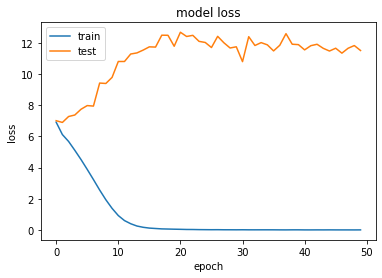

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [ ]:
quotes2 = " ".join(quotes)

print(quotes2)

tokenizer2 = RegexpTokenizer(r"\w+")

input_words = tokenizer2.tokenize(quotes2)
print(input_words)

It is not a lack of love, but a lack of friendship that makes unhappy marriages. That which does not kill us makes us stronger. I'm not upset that you lied to me, I'm upset that from now on I can't believe you. And those who were seen dancing were thought to be insane by those who could not hear the music. It is hard enough to remember my opinions, without also remembering my reasons for them!
['It', 'is', 'not', 'a', 'lack', 'of', 'love', 'but', 'a', 'lack', 'of', 'friendship', 'that', 'makes', 'unhappy', 'marriages', 'That', 'which', 'does', 'not', 'kill', 'us', 'makes', 'us', 'stronger', 'I', 'm', 'not', 'upset', 'that', 'you', 'lied', 'to', 'me', 'I', 'm', 'upset', 'that', 'from', 'now', 'on', 'I', 'can', 't', 'believe', 'you', 'And', 'those', 'who', 'were', 'seen', 'dancing', 'were', 'thought', 'to', 'be', 'insane', 'by', 'those', 'who', 'could', 'not', 'hear', 'the', 'music', 'It', 'is', 'hard', 'enough', 'to', 'remember', 'my', 'opinions', 'without', 'also', 'remembering', 'my',

In [ ]:
def prepare_input(text):
    x = np.zeros((1, LENGTH_WORD, 5))
    for t, char in enumerate(text):
       x[0, t, char_indices[char]] = 1.
    return x

In [ ]:
def sample(preds, top_n=3):
   preds = np.asarray(preds).astype('float64')
   preds = np.log(preds)
   exp_preds = np.exp(preds)
   preds = exp_preds / np.sum(exp_preds)
   return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completions(text, n=3):

    x = prepare_input(text)

    preds = model.predict(x, verbose=0)[0]

    next_indices = sample(preds, n)

    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [ ]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

In [ ]:
unique_word_index["it"]

4012

# 2. Assignment 1



In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

sent= ['the glass of water',
 'the glass of juice',
 'the cup of tea',
 'I am a good student',
 'I am a good developer',
 'I understand the meaning of embedding',
 'Your classes are good']

print(sent)

['the glass of water', 'the glass of juice', 'the cup of tea', 'I am a good student', 'I am a good developer', 'I understand the meaning of embedding', 'Your classes are good']


In [ ]:
for words in sent:
  print(words + "\n")

the glass of water

the glass of juice

the cup of tea

I am a good student

I am a good developer

I understand the meaning of embedding

Your classes are good



In [ ]:
voc_size=10000

onehot_repr=[one_hot("A black sheep A black sheep the",voc_size)]
#print(str(onehot_repr) + "\n")

for words in onehot_repr:
  print(str(words) + "\n")




[233, 2110, 4409, 233, 2110, 4409, 932]



In [ ]:
voc_size=10000

onehot_repr=[one_hot(words,voc_size)for words in sent]
#print(str(onehot_repr) + "\n")

for words in onehot_repr:
  print(str(words) + "\n")


help(one_hot)

[932, 6834, 766, 5822]

[932, 6834, 766, 1993]

[932, 2983, 766, 7498]

[6599, 8015, 233, 7566, 8222]

[6599, 8015, 233, 7566, 3826]

[6599, 874, 932, 5242, 766, 8619]

[9977, 8696, 8047, 7566]

Help on function one_hot in module keras.preprocessing.text:

one_hot(input_text, n, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', analyzer=None)
    One-hot encodes a text into a list of word indexes of size `n`.
    
    Deprecated: `tf.keras.text.preprocessing.one_hot` does not operate on tensors
    and is not recommended for new code. Prefer `tf.keras.layers.Hashing` with
    `output_mode='one_hot'` which provides equivalent functionality through a
    layer which accepts `tf.Tensor` input. See the [preprocessing layer guide]
    (https://www.tensorflow.org/guide/keras/preprocessing_layers)
    for an overview of preprocessing layers.
    
    This function receives as input a string of text and returns a
    list of encoded integers each corresponding to a word (o

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np


In [ ]:

sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[   0    0    0    0 3680 8558 1640 4346]
 [   0    0    0    0 3680 8558 1640  975]
 [   0    0    0    0 3680  766 1640 6332]
 [   0    0    0 8057  204  587 3486  999]
 [   0    0    0 8057  204  587 3486 4854]
 [   0    0 8057 6620 3680 9516 1640 2450]
 [   0    0    0    0 5352 8097 4411 3486]]


In [ ]:
dim=10

model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [ ]:

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 10)             100000    
                                                                 
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(embedded_docs))


1/1 [==============================] - 0s 180ms/step
[[[ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808
    0.0258084   0.00444048 -0.04580362 -0.04144593  0.03473849]
  [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808
    0.0258084   0.00444048 -0.04580362 -0.04144593  0.03473849]
  [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808
    0.0258084   0.00444048 -0.04580362 -0.04144593  0.03473849]
  [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808
    0.0258084   0.00444048 -0.04580362 -0.04144593  0.03473849]
  [ 0.0422742   0.03317669  0.02609212 -0.01482538 -0.03444948
    0.00865958 -0.01327223 -0.0371858   0.0265748  -0.011593  ]
  [-0.03624679  0.03922106  0.0032488   0.0350283  -0.01588307
   -0.02370187  0.0072384  -0.04969549 -0.00294925 -0.00549174]
  [ 0.04485646 -0.03050934 -0.02961415 -0.03989993  0.00891732
   -0.02562587 -0.02049413 -0.0327266   0.0256648   0.00085697]
  [ 0.0003127   0.04263387 -0.03182214  0.01302944 -0.0099

In [ ]:
embedded_docs[0]


array([   0,    0,    0,    0, 3680, 8558, 1640, 4346], dtype=int32)

In [ ]:
print(model.predict(embedded_docs)[0])


1/1 [==============================] - 0s 15ms/step
[[ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808  0.0258084
   0.00444048 -0.04580362 -0.04144593  0.03473849]
 [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808  0.0258084
   0.00444048 -0.04580362 -0.04144593  0.03473849]
 [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808  0.0258084
   0.00444048 -0.04580362 -0.04144593  0.03473849]
 [ 0.03914814  0.03882638 -0.00072511  0.00317807 -0.00741808  0.0258084
   0.00444048 -0.04580362 -0.04144593  0.03473849]
 [ 0.0422742   0.03317669  0.02609212 -0.01482538 -0.03444948  0.00865958
  -0.01327223 -0.0371858   0.0265748  -0.011593  ]
 [-0.03624679  0.03922106  0.0032488   0.0350283  -0.01588307 -0.02370187
   0.0072384  -0.04969549 -0.00294925 -0.00549174]
 [ 0.04485646 -0.03050934 -0.02961415 -0.03989993  0.00891732 -0.02562587
  -0.02049413 -0.0327266   0.0256648   0.00085697]
 [ 0.0003127   0.04263387 -0.03182214  0.01302944 -0.00996754 -0.042275
  -0.

## King Queen


In [ ]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.txt")
glove2word2vec(glove_file, word2vec_glove_file)

FileNotFoundError: ignored

In [ ]:
glove_file

'/content/glove.6B.100d.txt'

In [ ]:
word2vec_glove_file

'/tmp/glove.6B.100d.txt'

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)


ValueError: ignored

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

NameError: ignored

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('king', 'man', 'queen')


## RNN Code 2


In [ ]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re



In [ ]:
f = open('/content/drive/MyDrive/IIT KGP LAB/Twitter BiLSTM/Untitled folder/Text 2.txt', 'r')
paragraph = f.read()
print(paragraph)
f.close()


Apple Inc., formerly Apple Computer, Inc., American manufacturer of personal computers, smartphones, tablet computers, computer peripherals, and computer software. It was the first successful personal computer company and the popularizer of the graphical user interface. Headquarters are located in Cupertino, California.

Garage start-up
first Apple computer
first Apple computer
Apple II
Apple II
Apple Inc. had its genesis in the lifelong dream of Stephen G. Wozniak to build his own computer—a dream that was made suddenly feasible with the arrival in 1975 of the first commercially successful microcomputer, the Altair 8800, which came as a kit and used the recently invented microprocessor chip. Encouraged by his friends at the Homebrew Computer Club, a San Francisco Bay area group centred around the Altair, Wozniak quickly came up with a plan for his own microcomputer. In 1976, when the Hewlett-Packard Company, where Wozniak was an engineering intern, expressed no interest in his design,

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sentences = nltk.sent_tokenize(paragraph)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
 sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [ ]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)
words = model.wv.vocab

In [ ]:
# Visualise the embedding
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


# fit a 2d PCA model to the vectors
X = model[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


# create a scatter plot of the projection
max_visual = 20
pyplot.scatter(result[:max_visual, 0], result[:max_visual, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
 if i<max_visual:
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Finding Word Vectors
vector = model.wv['apple']
print(vector)


[ 0.0032496   0.00100689 -0.00270586  0.00430228 -0.00304305 -0.00528959
 -0.00485655 -0.00501775  0.00364371 -0.0032814   0.00117292  0.00258372
  0.00491909 -0.0030281  -0.00290345  0.00260778  0.00211658 -0.00218848
 -0.00046232 -0.00458593 -0.00392988 -0.0006036  -0.00127576  0.00027634
  0.00053845  0.00231036  0.00022059 -0.00199986 -0.00351385  0.00502804
 -0.00478009 -0.00219042  0.00081594  0.00410025  0.00336344  0.00205811
  0.00417331 -0.00280146  0.00408159  0.00068804  0.0015227  -0.00305457
 -0.00211582  0.00450959 -0.00186289 -0.00440196 -0.00100415 -0.00154238
 -0.00239631  0.00138466 -0.00067825  0.00366187  0.00125572 -0.0031398
  0.00239349 -0.00202416  0.00230814  0.00092543  0.00098362 -0.00342438
  0.00114021  0.00457033  0.00193493 -0.00158284 -0.00343397 -0.00361072
  0.00351741  0.00023183 -0.00174973  0.00163143  0.00471274 -0.00093582
 -0.00460663  0.00101144  0.00169226  0.00056366  0.00482867 -0.00278141
 -0.00498631 -0.00094462 -0.0013196  -0.0006102  -0.

In [ ]:
# Most similar words
similar = model.wv.most_similar('apple')
print(similar)


[('apples', 0.32719752192497253), ('enabled', 0.30884769558906555), ('broke', 0.3063235580921173), ('digital', 0.3005083203315735), ('automatically', 0.2977412939071655), ('manufacturers', 0.28694862127304077), (',', 0.2868245244026184), ('produce', 0.27619731426239014), ('When', 0.2712802588939667), ('inch', 0.26958775520324707)]


In [ ]:


# Solving Today's Objective
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('parched', 0.8552891612052917)]
